<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Science-Repo/blob/main/Sales_Prediction_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:4
SALES PREDICTION WITH PYTHON

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset=pd.read_csv('/content/advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
dataset.shape

(200, 4)

In [ ]:
dataset.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

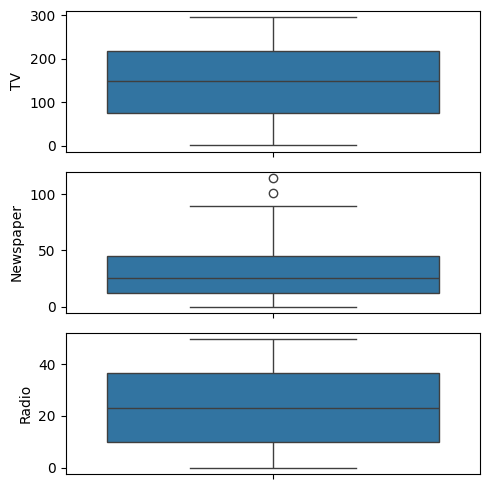

In [ ]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(dataset['TV'],ax=axs[0])
plt2=sns.boxplot(dataset['Newspaper'],ax=axs[1])
plt3=sns.boxplot(dataset['Radio'],ax=axs[2])
plt.tight_layout()

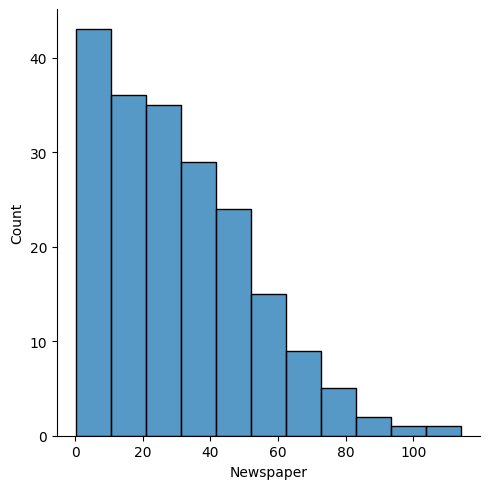

In [ ]:
sns.displot(dataset['Newspaper'])

In [ ]:
iqr=dataset.Newspaper.quantile(0.75) - dataset.Newspaper.quantile(0.25)
lower_bridge=dataset['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=dataset['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


<Axes: ylabel='Newspaper'>

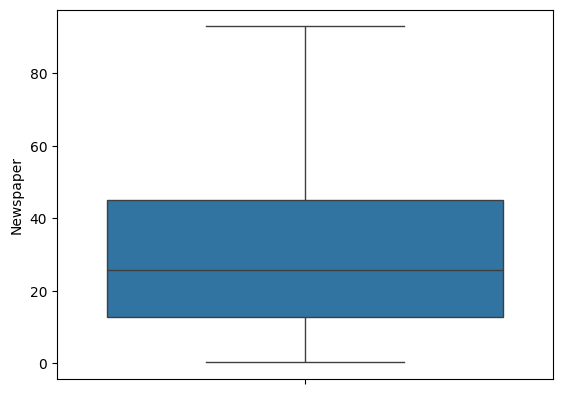

In [ ]:
data=dataset.copy()
data.loc[data['Newspaper']>=93,'Newspaper']=93
sns.boxplot(data['Newspaper'])


<Axes: ylabel='Sales'>

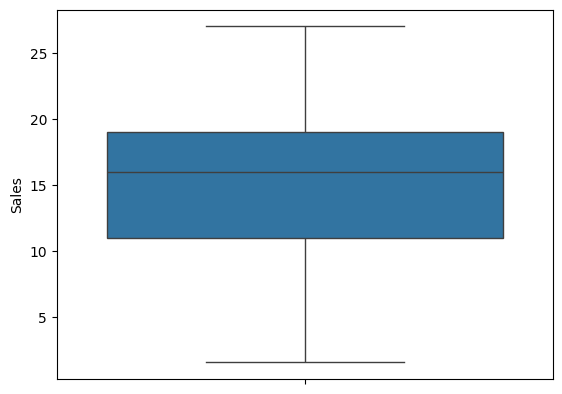

In [ ]:
sns.boxplot(data['Sales'])


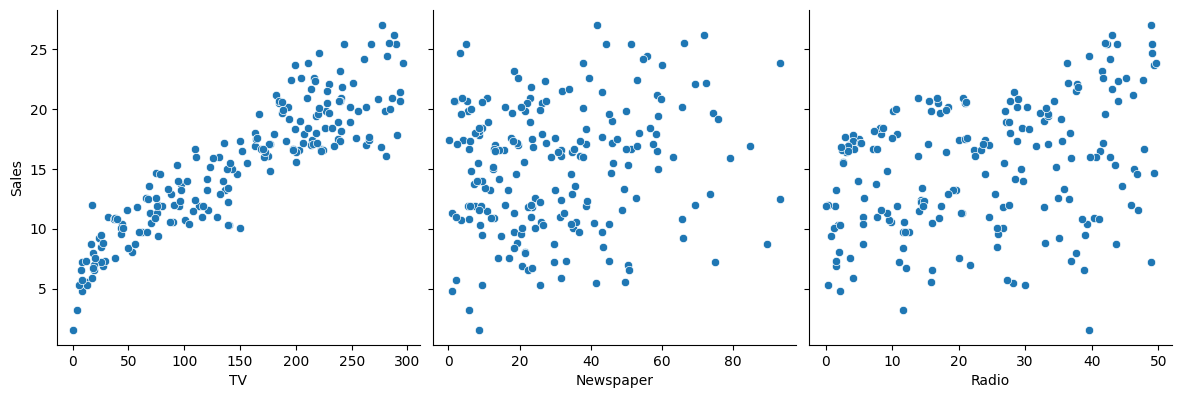

In [ ]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

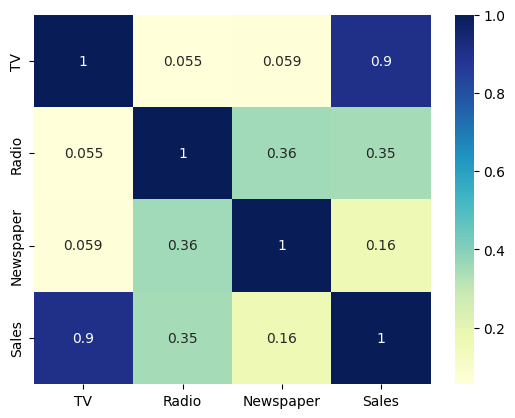

In [ ]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [ ]:
important_features=list(data.corr()['Sales'][(data.corr()['Sales']>+0.5)|(dataset.corr()['Sales']<0.5)].index)
print(important_features)

['TV', 'Radio', 'Newspaper', 'Sales']


In [ ]:
x=data['TV']
y=data['Sales']
X=x.values.reshape(-1,1)
X


array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,y.shape)

(200, 1) (200,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
kn=KNeighborsRegressor().fit(X_train,y_train)
kn

KNeighborsRegressor()

In [ ]:
kn_train_pred=kn.predict(X_train)
kn_test_pred=kn.predict(X_test)

In [ ]:
print(kn_train_pred,kn_test_pred)

[ 9.34 12.34 18.14  9.6  18.54  5.12  6.32  8.06 11.84 13.96 12.34 22.02
 18.32 19.24 16.4   9.94 14.46 14.66 19.52 20.44  9.08 12.78  9.6  20.24
 12.34 12.5  20.3   8.24  5.92 20.02 11.28 12.76  9.14  8.5   6.32 19.76
 14.    6.12 12.28 19.68 15.3  13.9   8.16 21.62 13.64 18.14 12.34 12.34
 19.1  19.72 24.82  5.92 11.28 21.4  17.9  10.48 13.52 20.44 18.56 19.52
 24.82 11.84 13.96 14.12 12.5  24.82 12.34 13.64 19.5   9.94 20.02 18.76
 18.14 12.78 12.28 18.04 20.3   9.86  8.48 18.4   9.94 11.94 14.22 14.44
 21.4  17.9  19.1  21.62  9.6  14.22 13.52 19.52 11.84  9.7  24.82  4.48
 11.28 11.94 19.36 18.32 18.14 20.02 16.54 14.44 21.48 19.82 12.78 20.36
 11.84 22.02 13.52  9.86 19.24 18.04 19.92 20.3  12.14 12.62 11.84 20.1
 12.78 19.24 16.54 20.36 12.5   4.48 19.82 18.32  8.06  9.94 19.92 13.66
 13.4  18.04] [24.82 16.54 19.36 19.42  8.06 24.82 13.64 19.82 17.9  13.64 19.28 16.54
  8.5   8.48 18.54 20.1  23.1  12.78 24.82 18.72 16.4  19.68 12.14 20.24
  9.08 22.02 11.68 11.84 16.4  11.88  

In [ ]:
results=pd.DataFrame(columns=['Model',"Train R2","Test R2","Test RMSE","Variance"])
r2=r2_score(y_test,kn_test_pred)
r2_train=r2_score(y_train,kn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, kn_test_pred))
variance = r2_train - r2
results = results.append({"Model": "K-Nearest Neighbors", "Train R2": r2_train, "Test R2": r2, "Test RMSE": rmse, "Variance": variance}, ignore_index=True)
print("R2:", r2)
print("RMSE:", rmse)

R2: 0.7769812528052217
RMSE: 2.4408617454919606


In [ ]:
results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.848445,0.776981,2.440862,0.071463


In [ ]:
X_train_constant=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_constant).fit()
model.params

const    6.720988
x1       0.057366
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     556.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           3.41e-49
Time:                        03:22:57   Log-Likelihood:                -303.06
No. Observations:                 134   AIC:                             610.1
Df Residuals:                     132   BIC:                             615.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7210      0.401     16.746      0.0

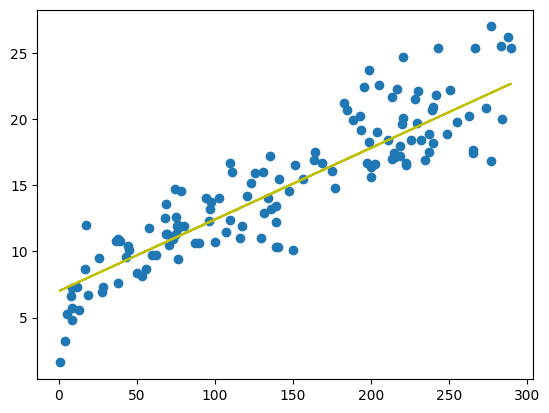

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9955+0.0541*X_train,'y')
plt.show()

In [ ]:
y_train_pred=model.predict(X_train_constant)
res=(y_train-y_train_pred)
res

60    -1.690047
116   -2.506278
55     5.568996
182   -1.244934
53     4.004055
         ...   
134    1.962222
128    5.341372
164   -1.544235
19    -0.570940
185    4.119066
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([ 9.79004718, 14.70627829, 18.13100404,  9.94493428, 17.19594492,
        7.03076228,  7.21433217,  7.69046657, 10.61037513, 13.37539659,
       14.82674603, 22.59404698, 18.9628051 , 20.4485739 , 16.38135353,
        8.98692892, 13.93184282, 14.4251869 , 19.47909542, 17.83270297,
        8.36164398, 12.29692349, 10.13997729, 17.52866534, 11.72326758,
       11.02914394, 22.03186419,  8.29854183,  7.20285905, 19.80034272,
       11.10371921, 12.12482672,  9.58926762,  7.79372464,  7.22006873,
       21.3721599 , 14.53418152,  7.3921655 , 10.93162244, 17.80402018,
       15.70443956, 14.47681593,  7.47821389, 20.99354701, 13.63354175,
       18.18263307, 14.76938044, 14.71201485, 19.07753628, 20.03554164,
       22.98986955,  7.1684397 , 11.09798265, 20.58625131, 16.87469761,
       10.29486438, 13.01972993, 17.93022447, 19.67413842, 19.47909542,
       23.21933192, 10.69068696, 14.1440955 , 12.88205251, 11.04061706,
       23.03002547, 14.72348797, 13.78269228, 18.05642877,  8.90

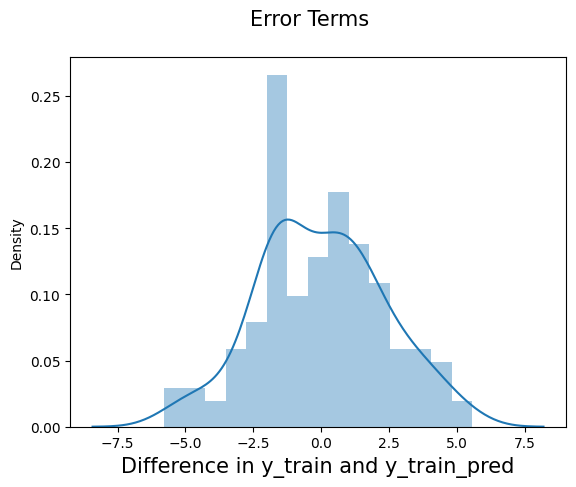

In [ ]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

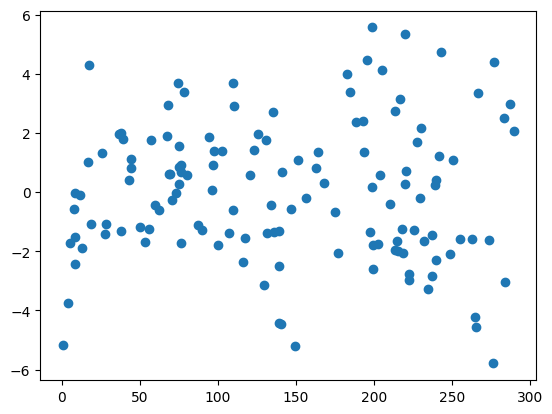

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_constant=sm.add_constant(X_test)
y_pred=model.predict(X_test_constant)
y_pred

array([23.12754697, 16.22072988, 17.32788577, 18.74481586,  7.70767625,
       23.56352546, 13.61633207, 20.48299325, 16.87469761, 13.66222454,
       19.57088036, 16.10026214,  7.83388055,  8.25838592, 17.09268685,
       21.80240183, 22.86366526, 12.2108751 , 23.39716525, 18.58992876,
       16.61655245, 19.75445025, 11.90683747, 17.49424599,  8.52800419,
       22.79482655, 10.51285362, 10.5587461 , 16.28956859, 14.63170302,
        7.79946119, 16.80012234, 16.48461159, 16.54771374, 13.19756326,
       17.49998255,  7.84535367, 11.6372192 , 21.71061689,  8.08628915,
       19.20947714,  8.15512786, 19.8175524 , 12.72142886, 18.05642877,
        7.74783216, 14.91853097, 11.78636973, 17.68355244, 20.38547175,
       18.81365457,  9.49174611,  9.19344504,  7.47247733, 19.13490187,
        8.16086442, 23.52336955, 20.97060077, 23.72414911, 20.47725669,
       22.82350934, 18.58419221, 12.10761704, 21.28037496,  7.1397569 ,
       15.30861699])

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.2229052178300757

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.8150318723186498

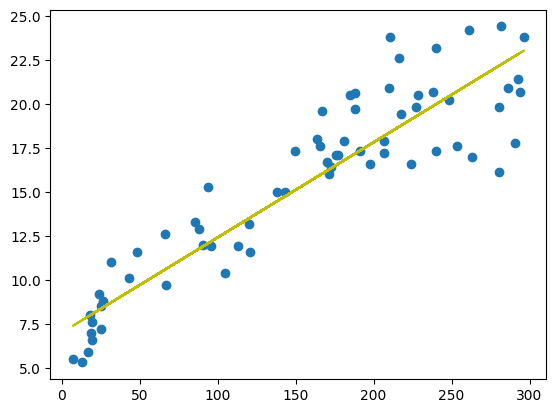

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.9955+0.0541*X_test,'y')
plt.show()